<a href="https://colab.research.google.com/github/06Cata/Kaggle_Titanic/blob/main/Kaggle_titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 讀取資料
import pandas as pd
import numpy as np
import seaborn as sb

url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/train.csv'

df_train = pd.read_csv(url)

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print(df_train.info())
print()
print((df_train['Cabin'].isna().sum()/df_train.shape[0]*100).round(2))
print()
print(df_train.isna().sum())

# age 用性別、艙等平均補
# Cabin 刪除，缺少 77%
# Embarked 用眾數補

# sex轉為One-Hot
# Embarked轉為One-Hot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

77.1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtyp

In [ ]:
print(df_train['Ticket'].value_counts())
# 不使用

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


In [ ]:
!pip install category_encoders

In [ ]:
# # 找出與「是否生存欄位」關係大的欄位，correlation、視覺化圖表、feature importance

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df_train['Sex_labeled'] = label_encoder.fit_transform(df_train['Sex'])
# # df_train['Embarked_labeled'] = label_encoder.fit_transform(df_train['Embarked'])

# from category_encoders.target_encoder import TargetEncoder
# target_encoder = TargetEncoder()
# df_train['Embarked'] = target_encoder.fit_transform(df_train['Embarked'])
# df_train

In [ ]:
# Age，用性別、艙等平均補
df_train['Age'].fillna(value=df_train.groupby(['Sex','Pclass'])['Age'].transform('mean'),inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C


In [ ]:
# 年齡多一欄，設為年齡組
bins = [0, 21, 65, 100]
labels = ['0-21', '22-65', '65-100']

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_train['AgeGroup'] = df_train['AgeGroup'].cat.codes  # 轉換為數值

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,1


In [ ]:
# Embarked，用眾數補
mode_embarked = df_train['Embarked'].mode()[0]

df_train['Embarked'].fillna(value=mode_embarked, inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,1


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
dtype: int64

In [ ]:
# 複製一張表，Sex、Embarked轉為One-Hot
# 原本欄位 : PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked

df_train_2 = df_train.copy()
df_train_2['Sex_new'] = df_train_2['Sex'].copy()
df_train_2['Embarked_new'] = df_train_2['Embarked'].copy()

df_train_2 = pd.get_dummies(df_train_2, columns=['Sex_new', 'Embarked_new'], prefix=['Sex_new', 'Embarked_new'])
df_train_2['Sex_new_female'] = df_train_2['Sex_new_female'].astype(int)
df_train_2['Sex_new_male'] = df_train_2['Sex_new_male'].astype(int)
df_train_2['Embarked_new_C'] = df_train_2['Embarked_new_C'].astype(int)
df_train_2['Embarked_new_Q'] = df_train_2['Embarked_new_Q'].astype(int)
df_train_2['Embarked_new_S'] = df_train_2['Embarked_new_S'].astype(int)

df_train_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,1,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,0,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,1,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,1,0,1,1,0,0


In [ ]:
!pip install plotly

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

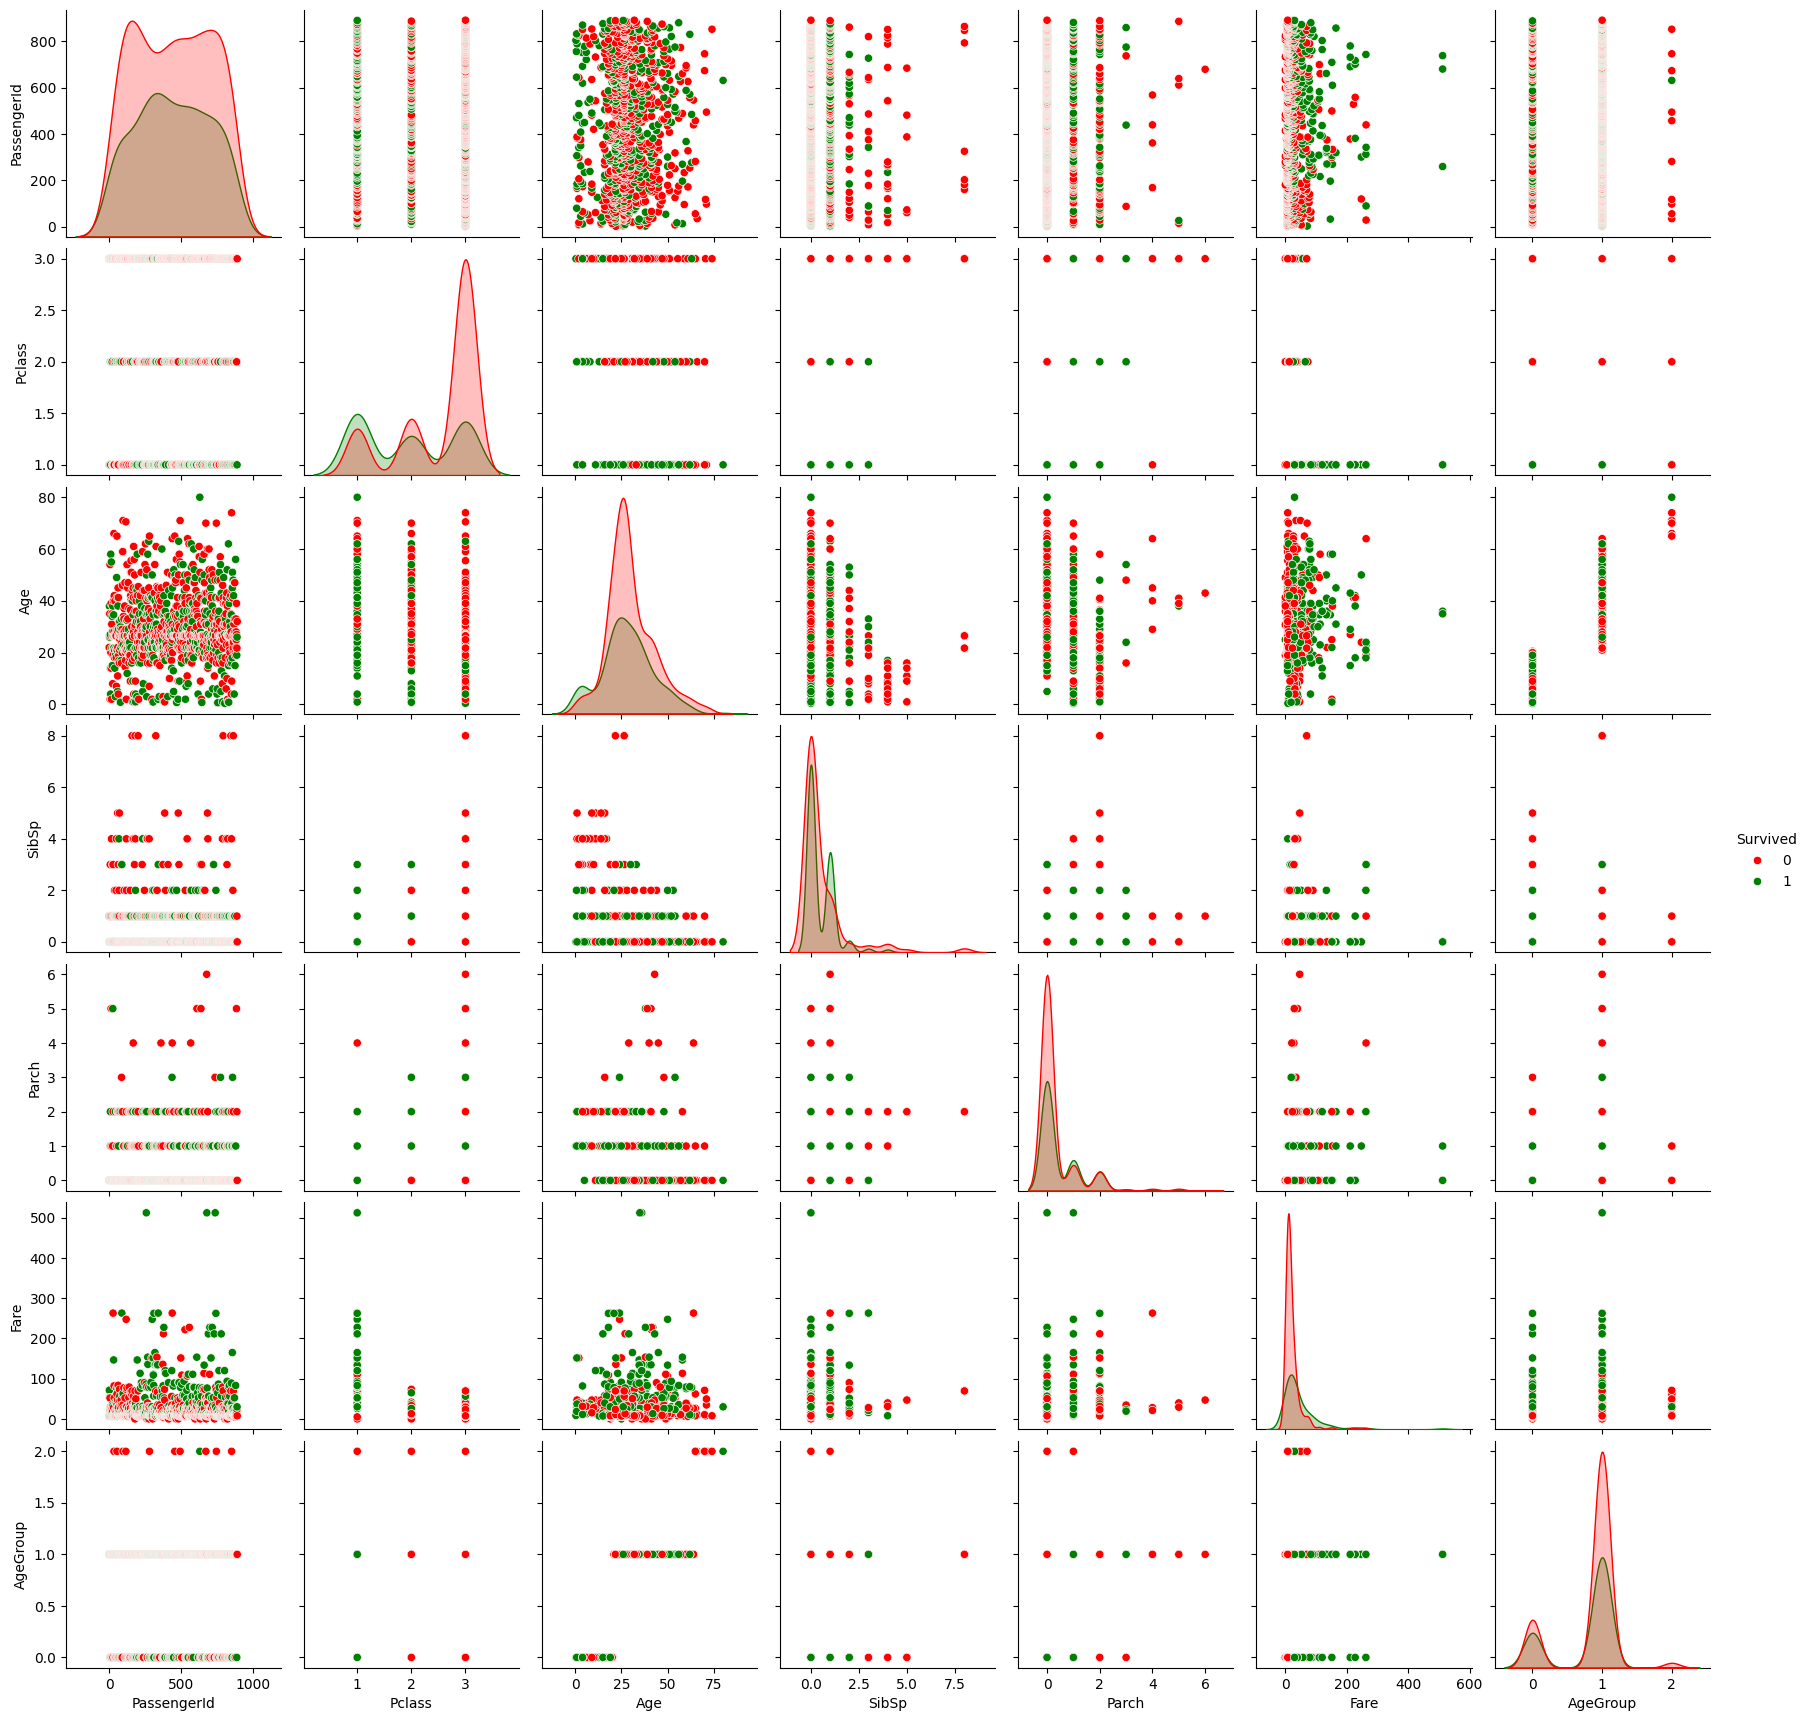

In [ ]:
# 查看關聯性
# 1

# 選取數值欄位
df_encoded = df_train.select_dtypes(include=[np.number])

palette = {0: "red", 1: "green"}

sb.pairplot(df_train, hue="Survived", palette=palette)

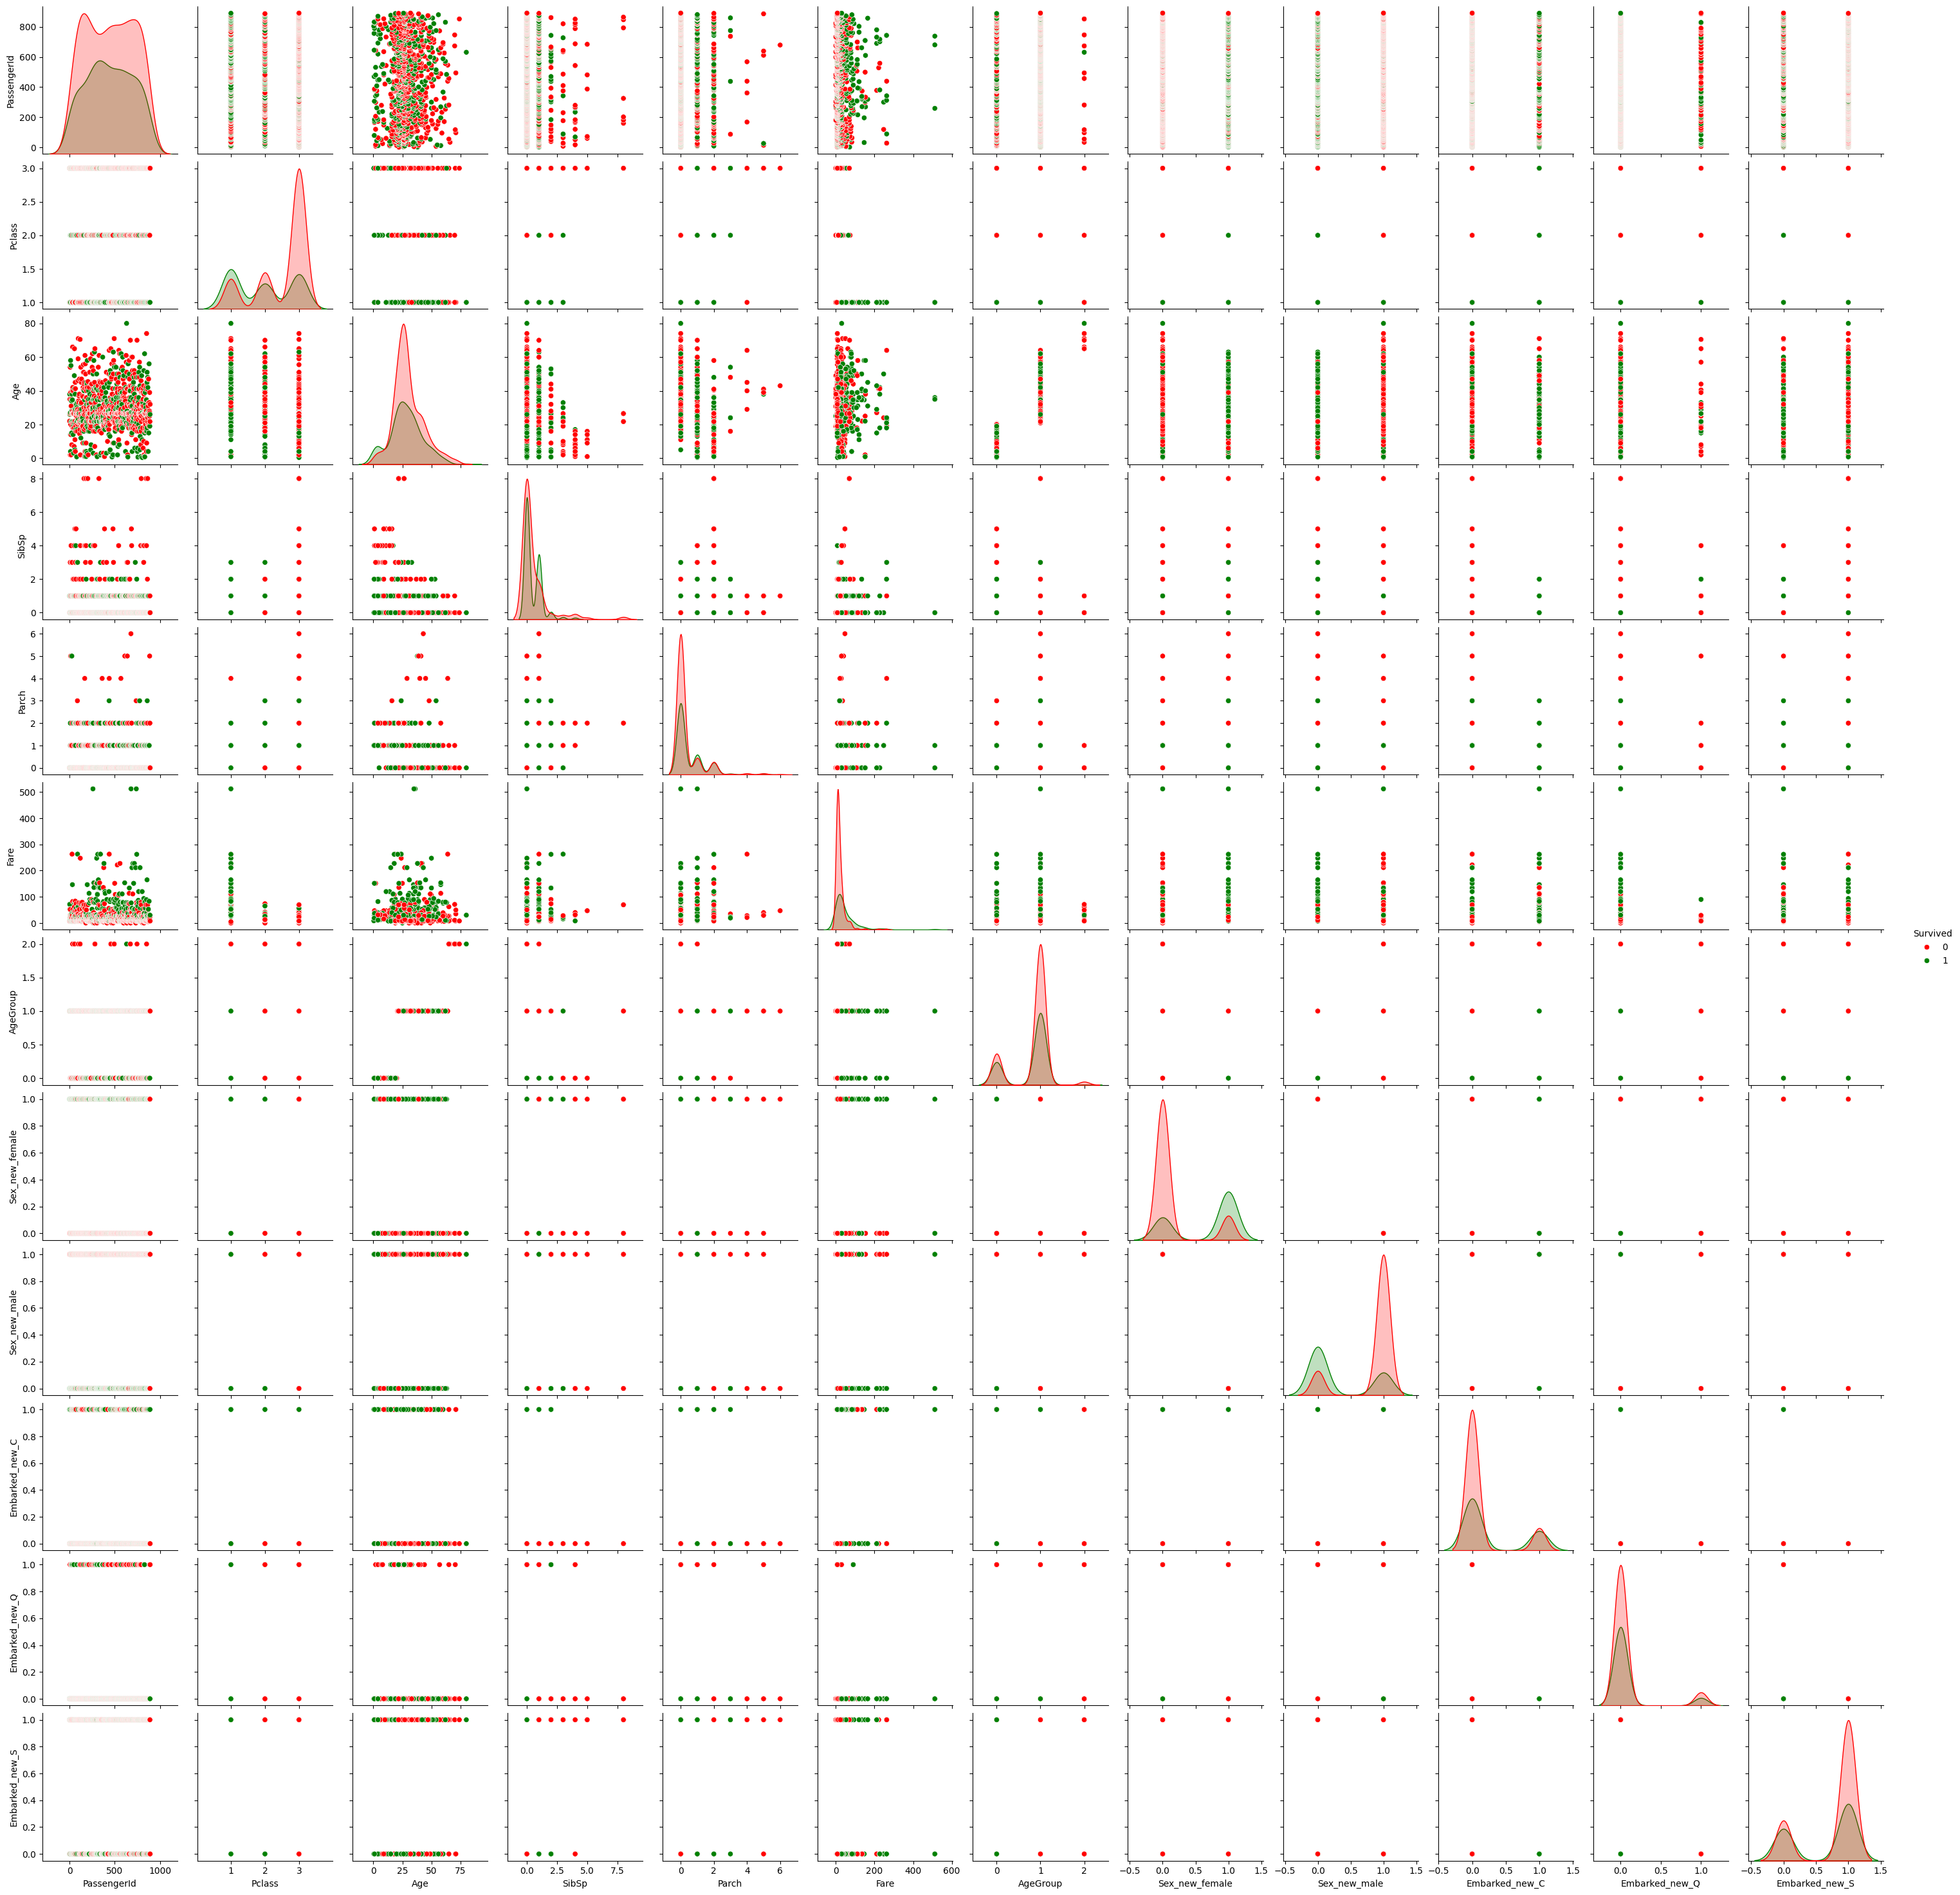

In [ ]:
# 1

# 選取數值欄位
df_encoded_2 = df_train_2.select_dtypes(include=[np.number])

palette = {0: "red", 1: "green"}

sb.pairplot(df_train_2, hue="Survived", palette=palette)

In [ ]:
# 2

# 選取數值欄位
df_encoded_2 = df_train_2.select_dtypes(include=[np.number])

# 相關係數矩陣
correlation_matrix = df_encoded_2.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S
PassengerId,1.000000,-0.005007,-0.035144,0.039636,-0.057527,-0.001652,0.012658,0.005455,-0.042939,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307,-0.088143,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500,-0.171214,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,0.039636,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308,0.688097,-0.112851,0.112851,0.041504,-0.084069,0.016545
SibSp,-0.057527,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651,-0.232936,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225,-0.229280,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000,0.021911,0.182333,-0.182333,0.269335,-0.117216,-0.162184
AgeGroup,0.005455,-0.088143,-0.171214,0.688097,-0.232936,-0.229280,0.021911,1.000000,-0.097021,0.097021,0.019465,0.062464,-0.056361
Sex_new_female,-0.042939,0.543351,-0.131900,-0.112851,0.114631,0.245489,0.182333,-0.097021,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_new_male,0.042939,-0.543351,0.131900,0.112851,-0.114631,-0.245489,-0.182333,0.097021,-1.000000,1.000000,-0.082853,-0.074115,0.119224


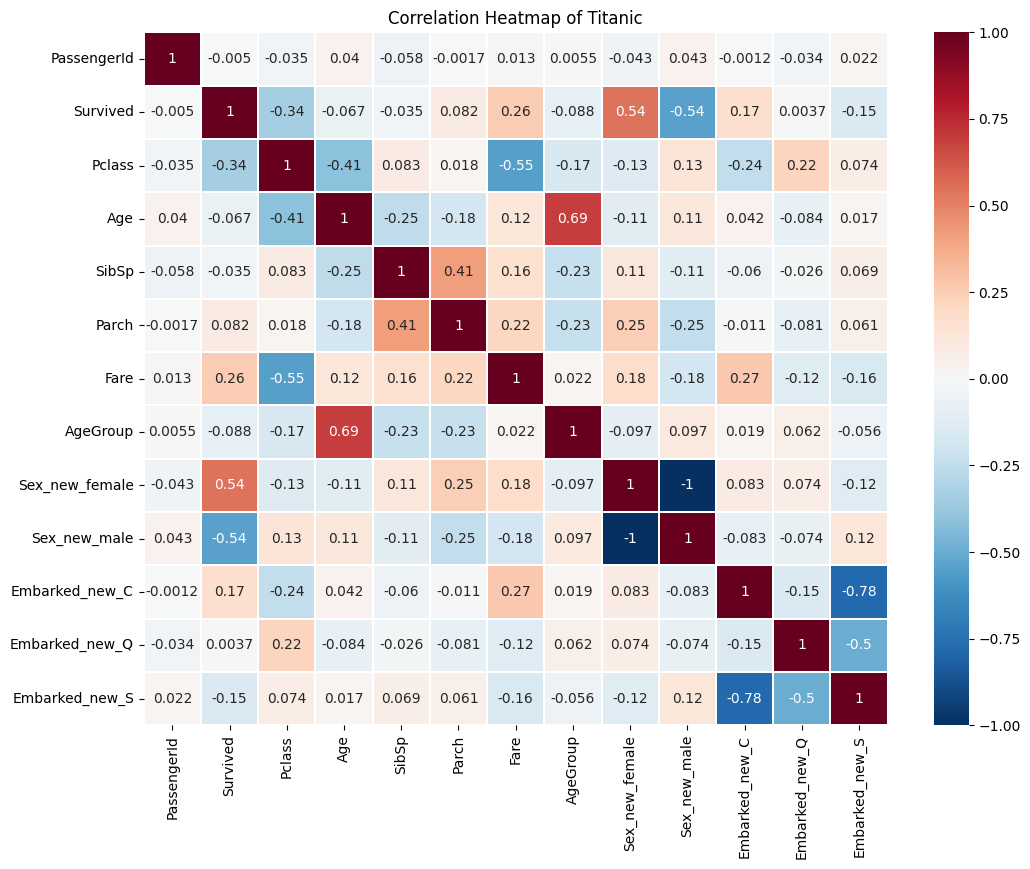

Survived          1.000000
Sex_new_female    0.543351
Fare              0.257307
Embarked_new_C    0.168240
Parch             0.081629
Embarked_new_Q    0.003650
PassengerId      -0.005007
SibSp            -0.035322
Age              -0.067485
AgeGroup         -0.088143
Embarked_new_S   -0.149683
Pclass           -0.338481
Sex_new_male     -0.543351
Name: Survived, dtype: float64


In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu_r',linewidths=0.2)
fig=plt.gcf()
plt.title("Correlation Heatmap of Titanic")
plt.show()

print(correlation_matrix['Survived'].sort_values(ascending=False))

# 性別: 女性 > 男性

# 艙等: 高艙等 > 低艙等
# 艙位等級與存活呈現負相關。1為一等艙，表示越高等級的艙位，存活率越高

# 票價: 高票價 > 低票價
# 票價與存活呈現正相關，票價越高，存活率越高

# 登船港口: Cherbourg > Southampton

# Parch 相關係數為 0.082，有父母或子女在船上的乘客，存活率略高

# SibSp 相關係數為 -0.035，有兄弟姐妹或配偶在船上的乘客，存活率的更低，但影響非常小

# 年齡組相關係數為 -0.088，年齡較大的乘客，存活率略低



In [ ]:
# 查看年齡分怖

## matplotlib
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=df_train_2['Age'], color='skyblue')
# plt.title('Age Quartiles')
# plt.xlabel('Age')
# plt.show()


fig = px.box(df_train_2, y='Age', points='all', color_discrete_sequence=['blue'])

#
fig.update_layout(
    title='Age Quartiles',
    yaxis_title='Age',
    xaxis_title='',
    width=800,
    height=600
)

fig.show()

In [ ]:
# 3
# 各年齡組存活率

# agegroup_survival = df_train_2.groupby('AgeGroup')['Survived'].mean()

# #
# plt.figure(figsize=(10, 6))
# agegroup_survival.plot(kind='bar', color='skyblue')
# plt.title('Survival Rate by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Survival Rate')
# plt.xticks(rotation=0)
# plt.show()

# #
# print(agegroup_survival)



agegroup_survival = df_train_2.groupby('AgeGroup')['Survived'].mean().reset_index()

#
fig = px.bar(
    agegroup_survival,
    x='AgeGroup',
    y='Survived',
    title='Survival Rate by Age Group',
    labels={'Survived': 'Survival Rate', 'AgeGroup': 'Age Group'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [ ]:
# 各年齡組存活人數

agegroup_survival_counts = df_train_2.groupby(['AgeGroup', 'Survived']).size().unstack()

# 顯示未存活的人數
trace1 = go.Bar(
    x=agegroup_survival_counts.index,
    y=agegroup_survival_counts[0],
    name='Not Survived',
    marker_color='lightcoral'
)

# 顯示存活的人數
trace2 = go.Bar(
    x=agegroup_survival_counts.index,
    y=agegroup_survival_counts[1],
    name='Survived',
    marker_color='lightgreen'
)

#
fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(barmode='group')

fig.update_layout(
    title='Passenger Count by Age Group and Survival Status',
    xaxis_title='Age Group',
    yaxis_title='Count',
    legend_title='Survival Status',
    width=1000,
    height=600
)

fig.show()

#
print(agegroup_survival_counts)

Survived    0    1
AgeGroup          
0          98   82
1         441  259
2          10    1


In [ ]:
# 4
# 艙等存活率

# pclass_sex_survival = df_train_2.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# pclass_sex_survival.plot(kind='bar', figsize=(10, 6), color=['salmon', 'skyblue'])
# plt.title('Survival Rate by Pclass and Gender')
# plt.xlabel('Pclass')
# plt.ylabel('Survival Rate')
# plt.xticks(rotation=0)
# plt.legend(title='Sex')
# plt.show()


# print(pclass_sex_survival)



pclass_sex_survival = df_train_2.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    pclass_sex_survival,
    x='Pclass',
    y='Survived',
    title='Survival Rate by Pclass and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'Pclass': 'Pclass'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [ ]:
# 5
# 港口存活率

embarked_survival = df_train_2.groupby('Embarked')['Survived'].mean().reset_index()

#
fig = px.bar(
    embarked_survival,
    x='Embarked',
    y='Survived',
    title='Survival Rate by Embarked',
    labels={'Survived': 'Survival Rate', 'Embarked': 'Embarked'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded_2.drop(['Survived'], axis=1)
y = df_encoded_2['Survived']

model = RandomForestClassifier()

model.fit(X, y)

# 特徵重要性
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


           Feature  Importance
0      PassengerId    0.183356
5             Fare    0.177557
2              Age    0.161975
8     Sex_new_male    0.146736
7   Sex_new_female    0.123814
1           Pclass    0.088924
3            SibSp    0.042036
4            Parch    0.028190
11  Embarked_new_S    0.014520
6         AgeGroup    0.014439
9   Embarked_new_C    0.012829
10  Embarked_new_Q    0.005625


# 模型

In [305]:
df_encoded_2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S
0,1,0,3,22.00,1,0,7.2500,1,0,1,0,0,1
1,2,1,1,38.00,1,0,71.2833,1,1,0,1,0,0
2,3,1,3,26.00,0,0,7.9250,1,1,0,0,0,1
3,4,1,1,35.00,1,0,53.1000,1,1,0,0,0,1
4,5,0,3,35.00,0,0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00,0,0,13.0000,1,0,1,0,0,1
887,888,1,1,19.00,0,0,30.0000,0,1,0,0,0,1
888,889,0,3,21.75,1,2,23.4500,1,1,0,0,0,1
889,890,1,1,26.00,0,0,30.0000,1,0,1,1,0,0


In [303]:
columns_X = list(set(df_encoded_2.columns) - {'Survived'})
columns_y = ['Survived']


train_X = df_encoded_2[columns_X]
train_y = df_encoded_2[columns_y]

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)

[0.77094972 0.80898876 0.80337079 0.78089888 0.80898876]
